In [90]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
def click_event(event, x, y, flags, param):
    points = param['points']
    img = param['img']
    if event == cv2.EVENT_LBUTTONDOWN:
        points.append((x, y))  # Append the new point to the points list

        # Draw a small circle at the point
        cv2.circle(img, (x, y), 2, (0, 0, 255), -1)

        # Draw the point number near the point
        point_number = len(points)
        cv2.putText(img, str(point_number), (x + 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

        # Update the display
        cv2.imshow("image", img)

def point_reader(img):
    '''
    img - The image to be marked points on
    '''
    points = []  # Initialize a new, empty list for points
    cv2.imshow('image', img)
    param = {'points': points, 'img': img}
    cv2.setMouseCallback('image', click_event, param)
    
    # Add loop to wait for 'q' key press to exit
    while True:
        # Display the image and wait for a key press
        key = cv2.waitKey(1) & 0xFF
        # Press 'q' to exit
        if key == ord('q'):
            break
    
    # Close the window after pressing 'q'
    cv2.destroyAllWindows()
    
    # Return the list of points as a numpy array
    return np.array(points, dtype=np.int32), img


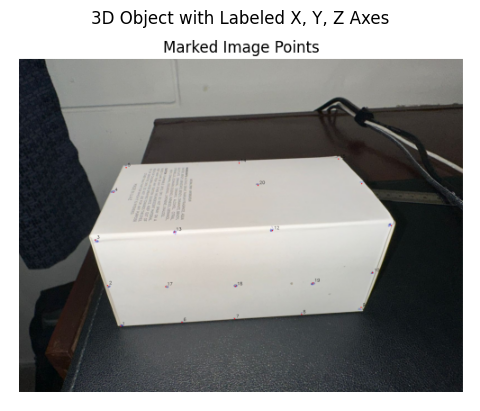

In [92]:

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load your image
#USING IMAGE WITH NUMBERS ADDED VIRTUALLY
img = cv2.imread("/Users/hassanadnan/Desktop/CS436_PA4/Marked_points.png")  # Replace with the path to your image

# Define origin and the axis points in the image (adjust these values based on your image)
origin = (150, 4200)  # Set this to the pixel coordinates of the origin point in your image
x_axis = (origin[0] + 50, origin[1])  # Extend 50 pixels along X
y_axis = (origin[0], origin[1] - 50)  # Extend 50 pixels along Y
z_axis = (origin[0] + 25, origin[1] - 25)  # Extend 50 pixels diagonally for Z (example)

# Draw axes on the image
img_with_axes = img.copy()
cv2.arrowedLine(img_with_axes, origin, x_axis, (0, 0, 255), 2)  # X-axis in red
cv2.arrowedLine(img_with_axes, origin, y_axis, (0, 255, 0), 2)  # Y-axis in green
cv2.arrowedLine(img_with_axes, origin, z_axis, (255, 0, 0), 2)  # Z-axis in blue

# Label the axes
cv2.putText(img_with_axes, 'X', x_axis, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
cv2.putText(img_with_axes, 'Y', y_axis, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
cv2.putText(img_with_axes, 'Z', z_axis, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# Display the image with labeled axes
plt.imshow(cv2.cvtColor(img_with_axes, cv2.COLOR_BGR2RGB))
plt.title("3D Object with Labeled X, Y, Z Axes")
plt.axis('off')
plt.show()


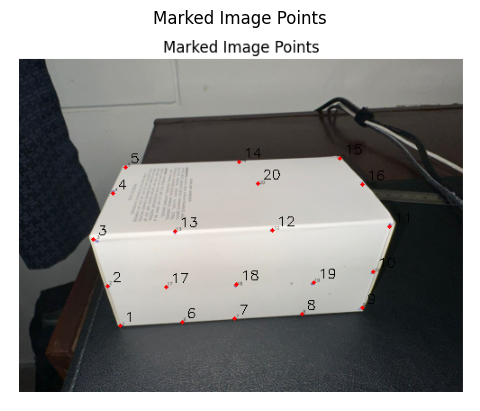

Image Coordinates (pixels):
 [[122 327]
 [108 283]
 [ 92 231]
 [114 180]
 [128 151]
 [191 323]
 [249 319]
 [324 314]
 [391 307]
 [403 267]
 [421 217]
 [291 221]
 [183 222]
 [254 145]
 [366 141]
 [391 170]
 [173 284]
 [251 281]
 [337 279]
 [275 169]]
World Coordinates (mm):
 [[  0   0   0]
 [  0  30   0]
 [  0  60   0]
 [  0  60  40]
 [  0  60  80]
 [ 40   0   0]
 [ 67   0   0]
 [100   0   0]
 [135   0   0]
 [135  30   0]
 [135  60   0]
 [ 80  60   0]
 [ 40  60   0]
 [ 77  60  80]
 [135  60  80]
 [135  60  40]
 [ 30  35   0]
 [ 67  30   0]
 [105  26   0]
 [ 80  60  40]]


In [93]:


image_coords, marked_img = point_reader(img_with_axes)

# Define corresponding world coordinates in millimeters
# Example: Adjust these coordinates according to the real-world layout of your object.
# These should represent the actual 3D positions of the points you marked in the image.
world_coords = np.array([
    [0, 0, 0],        # Origin point (e.g., bottom-left corner of the object)
    [0, 30, 0],       # 
    [0, 60, 0],       # 
    [0, 60, 40],      #4
    [0, 60, 80],     #5    50mm along Z
    [40, 0, 0],      #6
    [67, 0, 0],     #7
    [100, 0, 0],      #8
    [135, 0, 0],      #9
    [135, 30, 0],      #10
    [135, 60, 0],      #11
    [80, 60, 0],         #12
    [40, 60, 0],        #13
    [77, 60, 80],      #14
    [135, 60, 80],      #15
    [135, 60, 40],      #16
    [30, 35, 0],      #17
    [67, 30, 0],        #18
    [105, 26, 0],      #19
    [80, 60, 40]      #20
    
    
    # Add the rest of the points in 3D space corresponding to your object setup
    # Example points can be added as per the dimensions and structure of the object
])

# Display the marked image with points
plt.imshow(cv2.cvtColor(marked_img, cv2.COLOR_BGR2RGB))
plt.title("Marked Image Points")
plt.axis('off')
plt.show()

print("Image Coordinates (pixels):\n", image_coords)
print("World Coordinates (mm):\n", world_coords)


### Establishing World Coordinates in Millimeters 


In [94]:

#TO PREVENT RECLICKING EACH POINT MULTIPLE TIMES

image_coords = np.array([
    [123, 327],
    [109, 285],
    [91, 232],
    [113, 182],
    [127, 153],
    [195, 323],
    [253, 319],
    [318, 315],
    [389, 311],
    [405, 269],
    [426, 214],
    [287, 221],
    [187, 226],
    [258, 143],
    [360, 139],
    [387, 170],
    [171, 274],
    [251, 275],
    [336, 279],
    [276, 176]
])


world_coords = np.array([
    [0, 0, 0],        # Origin point (e.g., bottom-left corner of the object)
    [0, 30, 0],       # 
    [0, 60, 0],       # 
    [0, 60, 40],      #4
    [0, 60, 80],     #5    50mm along Z
    [40, 0, 0],      #6
    [67, 0, 0],     #7
    [100, 0, 0],      #8
    [135, 0, 0],      #9
    [135, 30, 0],      #10
    [135, 60, 0],      #11
    [80, 60, 0],         #12
    [40, 60, 0],        #13
    [77, 60, 80],      #14
    [135, 60, 80],      #15
    [135, 60, 40],      #16
    [30, 35, 0],      #17
    [67, 30, 0],        #18
    [105, 26, 0],      #19
    [80, 60, 40]      #20
    
    
    # Add the rest of the points in 3D space corresponding to your object setup
    # Example points can be added as per the dimensions and structure of the object
])
print("Image Coordinates (pixels):\n", image_coords)
print("World Coordinates (mm):\n", world_coords)

Image Coordinates (pixels):
 [[123 327]
 [109 285]
 [ 91 232]
 [113 182]
 [127 153]
 [195 323]
 [253 319]
 [318 315]
 [389 311]
 [405 269]
 [426 214]
 [287 221]
 [187 226]
 [258 143]
 [360 139]
 [387 170]
 [171 274]
 [251 275]
 [336 279]
 [276 176]]
World Coordinates (mm):
 [[  0   0   0]
 [  0  30   0]
 [  0  60   0]
 [  0  60  40]
 [  0  60  80]
 [ 40   0   0]
 [ 67   0   0]
 [100   0   0]
 [135   0   0]
 [135  30   0]
 [135  60   0]
 [ 80  60   0]
 [ 40  60   0]
 [ 77  60  80]
 [135  60  80]
 [135  60  40]
 [ 30  35   0]
 [ 67  30   0]
 [105  26   0]
 [ 80  60  40]]


### Computing Camera Matrix P 


In [96]:
# Compute the camera matrix P using SVD
    
import numpy as np

def compute_camera_matrix(world_points, image_points):
    """
    Compute the camera matrix P using world points and corresponding image points.

    Parameters:
    - world_points: np.array of shape (N, 3), where N is the number of points.
    - image_points: np.array of shape (N, 2), corresponding image coordinates.

    Returns:
    - P: The 3x4 camera projection matrix.
    """
    # Ensure world_points and image_points are numpy arrays
    world_points = np.asarray(world_points)
    image_points = np.asarray(image_points)
    num_points = world_points.shape[0]

    # Create the A matrix
    A = []
    for i in range(num_points):
        X, Y, Z = world_points[i]
        x, y = image_points[i]
        
        # First row for the ith point
        A.append([X, Y, Z, 1, 0, 0, 0, 0, -x*X, -x*Y, -x*Z, -x])
        
        # Second row for the ith point
        A.append([0, 0, 0, 0, X, Y, Z, 1, -y*X, -y*Y, -y*Z, -y])

    # Convert A to numpy array
    A = np.array(A)

    # Perform SVD on A
    U, S, Vt = np.linalg.svd(A)
    
    # The last row of V (or last column of V transpose) is the solution for P
    P = Vt[-1].reshape(3, 4)

    return P


P = compute_camera_matrix(world_coords, image_coords)
print("Camera Matrix P:\n", P)



Camera Matrix P:
 [[ 5.52561747e-03 -2.32553285e-03  2.63798124e-03  3.48211244e-01]
 [-4.09443635e-04 -6.73264436e-03 -3.92656019e-04  9.37364441e-01]
 [-4.27551909e-07 -9.65488699e-06  1.24638222e-05  2.87829164e-03]]


### Decompose the Camera Matrix 

Decompose the camera matrix \(P\) into intrinsic parameters \(K\), rotation matrix \(R\), and translation vector \(t\).


In [97]:

# Decompose camera matrix P into K (intrinsic), R (rotation), and t (translation).\n",

# print("Projection Matrix: \n", P)
# print("Intrinsic Matrix: \n", K)
# print("Rotation Matrix: \n", R) 
# print("Camera Centre:", C)
import numpy as np

def decompose_camera_matrix(P):
    """
    Decompose camera matrix P into intrinsic matrix K, rotation matrix R, and camera center C.
    
    Parameters:
    - P: The 3x4 camera matrix.

    Returns:
    - K: Intrinsic matrix (3x3)
    - R: Rotation matrix (3x3)
    - C: Camera center (3x1)
    """
    # Extract the 3x3 part of P (for QR decomposition)
    M = P[:, :3]
    
    # Perform RQ decomposition on M to get K and R
    K, R = np.linalg.qr(np.linalg.inv(M))
    
    # Invert K and R to get the correct orientation
    K = np.linalg.inv(K)
    R = np.linalg.inv(R)
    
    # Ensure positive values along the diagonal of K
    T = np.diag(np.sign(np.diag(K)))
    K = K @ T
    R = T @ R
    
    # Calculate the camera center (C) as the null space of P
    U, S, Vt = np.linalg.svd(P)
    C = Vt[-1]
    C = C / C[-1]  # Normalize to ensure last coordinate is 1

    # Translation vector t can be computed as: t = -R * C[:3]
    t = -R @ C[:3]

    return K, R, t

# Call the function
K, R, C = decompose_camera_matrix(P)

print("Projection Matrix:\n", P)
print("Intrinsic Matrix K:\n", K)
print("Rotation Matrix R:\n", R)
print("Camera Center (C):\n", C[:3])


Projection Matrix:
 [[ 5.52561747e-03 -2.32553285e-03  2.63798124e-03  3.48211244e-01]
 [-4.09443635e-04 -6.73264436e-03 -3.92656019e-04  9.37364441e-01]
 [-4.27551909e-07 -9.65488699e-06  1.24638222e-05  2.87829164e-03]]
Intrinsic Matrix K:
 [[ 0.99812422 -0.05998739  0.01222912]
 [ 0.05489218  0.78845112 -0.61264319]
 [ 0.0271088   0.61216529  0.790265  ]]
Rotation Matrix R:
 [[ 5.62249510e-03  8.58854251e-05 -3.35852186e-03]
 [ 0.00000000e+00 -5.57139430e-03 -3.82228838e-03]
 [ 0.00000000e+00  0.00000000e+00  1.57716996e-05]]
Camera Center (C):
 [-0.71160749  0.34335681  0.00186767]



### Reprojection Error Calculation  


Average Reprojection Error: 1.5046193761689264


[ WARN:0@3653.310] global loadsave.cpp:241 findDecoder imread_('image_with_points.jpg'): can't open/read file: check file path/integrity


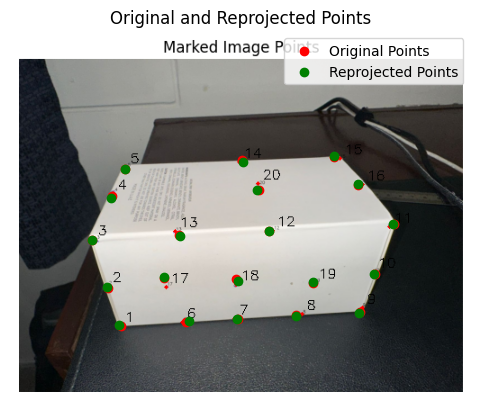

In [98]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def reprojection_error(P, world_coords, image_coords):
    """
    Reproject 3D world points onto the 2D image plane using camera matrix P.
    Then calculate the average reprojection error.

    Parameters:
    - P: The camera matrix (3x4).
    - world_coords: 3D world coordinates (N x 3).
    - image_coords: 2D image coordinates (N x 2).

    Returns:
    - avg_error: The average reprojection error.
    - reprojected_points: The reprojected 2D image coordinates.
    """
    # Convert world coordinates to homogeneous coordinates by adding a column of ones
    world_coords_homogeneous = np.hstack((world_coords, np.ones((world_coords.shape[0], 1))))

    # Reproject the world points to the image plane
    reprojected_homogeneous = world_coords_homogeneous @ P.T  # Multiply by the transpose of P

    # Convert from homogeneous coordinates to 2D by dividing by the third coordinate
    reprojected_points = reprojected_homogeneous[:, :2] / reprojected_homogeneous[:, 2][:, np.newaxis]

    # Calculate the reprojection error (Euclidean distance between the original and reprojected points)
    error = np.sqrt(np.sum((reprojected_points - image_coords)**2, axis=1))

    # Calculate the average error
    avg_error = np.mean(error)

    return avg_error, reprojected_points

# Example: assuming you have already obtained the world coordinates and image coordinates
# world_coords: 3D world coordinates (N x 3)
# image_coords: 2D image coordinates (N x 2)

# Reproject the points and calculate error
avg_error, reprojected_points = reprojection_error(P, world_coords, image_coords)

# Display results
print("Average Reprojection Error:", avg_error)

# Visualize the results by plotting the original and reprojected points
img_with_points = cv2.imread('image_with_points.jpg')  # Use your image with marked points

# Plot original image points in red and reprojected points in green
plt.imshow(cv2.cvtColor(marked_img, cv2.COLOR_BGR2RGB))  # Convert to RGB for correct color display
plt.scatter(image_coords[:, 0], image_coords[:, 1], color='red', label='Original Points')
plt.scatter(reprojected_points[:, 0], reprojected_points[:, 1], color='green', label='Reprojected Points')

# Add legend, title, and remove axes
plt.legend()
plt.title('Original and Reprojected Points')
plt.axis('off')
plt.show()


##  Height Estimation using Known Height 

**Objective**:  
Takes an image of a scene with multiple objects, including an object of known height (Like a desk), calculates the height of a second object in the image 

In [99]:
import cv2

# Initialize a list to store the coordinates
points = []

# Callback function for mouse click event
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        # Draw a circle at the clicked position
        cv2.circle(image, (x, y), 5, (0, 0, 255), -1)
        points.append((x, y))  # Store the clicked point
        cv2.imshow('Image', image)

# Load the image once
image = cv2.imread('/Users/hassanadnan/Desktop/CS436_PA4/Screenshot 2024-11-14 at 7.08.06 PM.png')

# Display the image and set the mouse callback to select points
cv2.imshow('Image', image)
cv2.setMouseCallback('Image', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()


print("Selected points:", points)


Selected points: []


In [100]:
# Example coordinates obtained from manual selection
# [(1663, 2535), (1660, 1975), (1415, 2510), (1376, 566)]
vx = 1288
vy = 530
# Assigning the coordinates to variables
x1, y1 = 1312, 1193  # Bottom of the known height object
x2, y2 = 740, 881   # Top of the known height object
x3, y3 = 528, 1100  # Bottom of the unknown height object
x4, y4 = 639, 265   # Top of the unknown height object

b1 = np.array([x1, y1, 1])  # Bottom of known height object
t1 = np.array([x2, y2, 1])  # Top of known height object
b2 = np.array([x3, y3, 1])  # Bottom of unknown height object
t2 = np.array([x4, y4, 1])  # Top of unknown height object

v = np.array([vx, vy, 1])   # Vertical vanishing point
# Draw circles for the selected points
for point in points:
    cv2.circle(image, point, 5, (0, 255, 0), -1)

# Show the image with the points marked
cv2.imshow('Marked Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [101]:
import numpy as np
import cv2

def line_from_points(p1, p2):
    """
    Given two points p1 and p2, compute the line equation (Ax + By + C = 0) in homogeneous coordinates.
    """
    line = np.cross(p1, p2)
    return line

def calculate_vanishing_point(line1, line2):
    """ Calculate the intersection of two lines to get the vanishing point. """
    vp = np.cross(line1, line2)
    
    # Avoid normalization issues with very small z-components
    if np.abs(vp[2]) < 1e-6:
        print("Warning: Vanishing point z-component is near zero.")
        return None
    
    vp = vp / vp[2]  # Normalize to make it homogeneous
    print("Vanishing Point: ", vp)
    return vp

def compute_height_ratio(b1, b2, t1, t2, v):
    """
    Compute the height ratio using Algorithm 8.1.
    """
    # Step 1: Compute vanishing point l (ground plane or vanishing line)
    l = np.cross(t1, t2)
    print("---b1: ", b1)
    print("---b2: ", b2)
    print("---l (Vanishing Line): ", l)
    
    # Check if the cross product is degenerate (zero or near zero vector)
    if np.allclose(l, [0, 0, 0]):
        print("Warning: The lines are degenerate (parallel or overlapping).")
        return np.nan  # Return NaN if lines are degenerate
    
    # Step 2: Compute vector u using vanishing point and vanishing line
    u = np.cross(np.cross(b1, b2), l)
    print("-----u: ", u)
    
    # Check for division by zero in normalization step
    if u[2] == 0:
        print("Warning: Normalization of vector u results in division by zero.")
        return np.nan  # Return NaN if normalization cannot be performed
    
    u = u / u[2]  # Normalize
    
    # Step 3: Compute transferred point t̃1
    l2 = np.cross(v, b2)
    t1_tilde = np.cross(np.cross(t1, u), l2)
    print("-----t1_tilde: ", t1_tilde)

    if t1_tilde[2] == 0:
        print("Warning: Normalization of t1_tilde results in division by zero.")
        return np.nan  # Return NaN if normalization cannot be performed
    
    t1_tilde = t1_tilde / t1_tilde[2]  # Normalize
    
    # Step 4: Calculate the distance ratios
    d1 = np.linalg.norm(t1_tilde[:2] - b2[:2])
    d2 = np.linalg.norm(t2[:2] - b2[:2])
    
    # Debugging: Print the distances
    # print("Distance 1:", d1)
    # print("Distance 2:", d2)
    
    # Avoid division by zero
    if d2 == 0:
        print("Warning: Distance ratio calculation has d2 == 0")
        return np.nan  # Return NaN if division by zero
    
    distance_ratio = d1 / d2
    return distance_ratio

def estimate_height(h1, height_ratio):
    """
    Estimate height of the second object using known height h1 and height ratio.
    """
    h2 = h1 * height_ratio
    return h2

# Known height of the box in mm
h1 = 60  # Height of the known object (box) in mm

b1 = np.array([497, 812, 1])  # Bottom left of known height object (box)
t1 = np.array([499, 709, 1])   # Top left of known height object (box)
b2 = np.array([666, 887, 1])   # Bottom right of known height object (box)
t2 = np.array([662, 746, 1])    # Top right of known height object (box)

# Coordinates for the unknown object (water bottle) - Bottom (b3), Top (t3)
b3 = np.array([436, 800, 1])   # Bottom of unknown object (water bottle)
t3 = np.array([462, 476, 1])    # Top of unknown object (water bottle)

# Vanishing point for vertical lines
image = cv2.imread('/Users/hassanadnan/Desktop/CS436_PA4/Screenshot 2024-11-14 at 7.08.06 PM.png')
height, width, _ = image.shape

v = np.array([width // 2, height, 1])  # Assuming the horizon is at the bottom of the image

print("Vanishing Point (v):", v)

cv2.circle(image, (v[0], v[1]), 5, (255, 0, 0), -1)  # Blue dot to mark the vanishing point
cv2.imshow("Image with Vanishing Point", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

line_b1b2 = line_from_points(b1, b2)
line_t1t2 = line_from_points(t1, t2)

vanishing_point = calculate_vanishing_point(line_b1b2, line_t1t2)

# Check if vanishing point was successfully calculated
if vanishing_point is None:
    print("Failed to calculate vanishing point. Check lines or assumptions.")
else:
    # Calculate the height ratio using Algorithm 8.1
    height_ratio = compute_height_ratio(b1, b3, t1, t3, vanishing_point)

    if np.isnan(height_ratio):
        print("Height ratio is NaN, possibly due to degenerate lines.")
    else:
        # Estimate the height of the unknown object (water bottle)
        h2 = estimate_height(h1, height_ratio)

        print("Estimated height of the water bottle:", h2, "cm")


Vanishing Point (v): [ 423 1024    1]
Vanishing Point:  [ 19.79855995 600.22421299   1.        ]
---b1:  [497 812   1]
---b2:  [436 800   1]
---l (Vanishing Line):  [   233    -37 -90034]
-----u:  [ 7104090 11231752    13769]
-----t1_tilde:  [-21331328.48761241 -34478818.92405244    -41034.31189799]
Estimated height of the water bottle: 17.166943968553888 cm


In [102]:
import numpy as np
import cv2

# Given coordinates for the known object (box)
b1 = np.array([497, 812])  # Bottom left of known height object (box)
t1 = np.array([499, 709])   # Top left of known height object (box)
b2 = np.array([666, 887])   # Bottom right of known height object (box)
t2 = np.array([662, 746])    # Top right of known height object (box)

image = cv2.imread('/Users/hassanadnan/Desktop/CS436_PA4/Screenshot 2024-11-14 at 7.08.06 PM.png')

# Draw lines b1b2 and t1t2
# b1b2 (bottom-left to bottom-right)
cv2.line(image, tuple(b1), tuple(b2), (0, 255, 0), 2)  # Green line, thickness 2
# t1t2 (top-left to top-right)
cv2.line(image, tuple(t1), tuple(t2), (0, 0, 255), 2)  # Red line, thickness 2

# Display the image with lines drawn
cv2.imshow("Image with lines", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
